<a href="https://colab.research.google.com/github/ayushanand18/ocean-research-py/blob/main/notebooks/ayush's_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration
Let us explorate our data and bring out areas where we need to focus on in future.

## installing pyobis

In [1]:
try:
  import pyobis
except:
  %pip install pyobis
  import pyobis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## importing other modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pyobis.occurrences import OccQuery

In [3]:
try:
  import cartopy
except:
  %pip -q install cartopy
  import cartopy

     |████████████████████████████████| 10.8 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 9.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 28.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 43.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 28.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46 kB 3.3 MB/s 


## grabbing some data

In [4]:
occ = OccQuery()

setting up environment variables

In [7]:
STARTDATE = "1999-01-01"
ENDDATE = "2017-12-31"
GEOMETRY = "POLYGON ((147.1875 -63.2679, 146.9532 -46.2996, 96.6797 -46.8631, 98.5547 -63.4779, 98.671 -63.4779, 147.1875 -63.2679))"
STARTDEPTH = -2000
TAXON = 1100

In [8]:
df = occ.search(taxonid = TAXON, startdepth = STARTDEPTH, startdate=STARTDATE, enddate=ENDDATE, geometry=GEOMETRY)


Fetched 104893 records.


so we have 92999 records in total for the species.

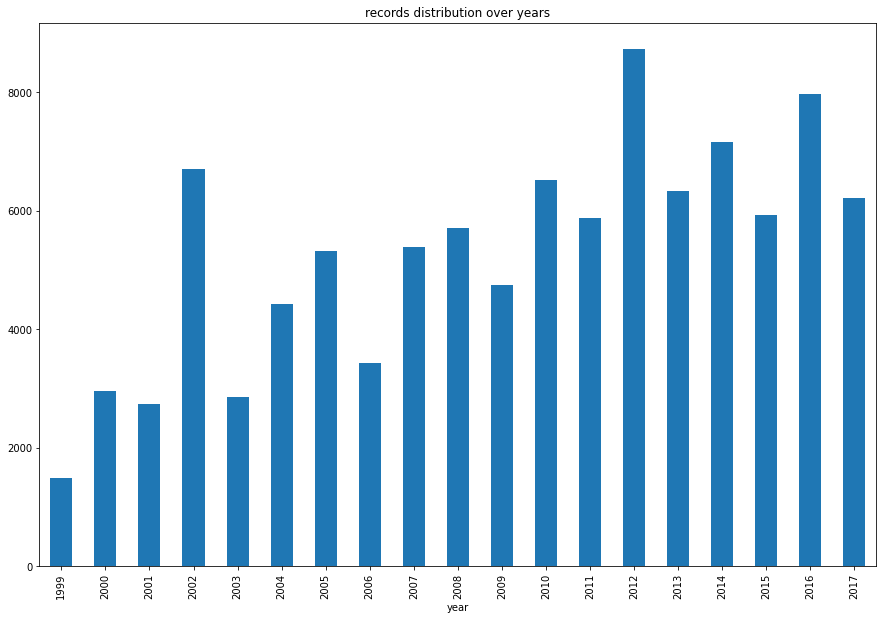

In [12]:
df.groupby("year").scientificName.count().plot.bar(figsize=(15,10))
plt.title("records distribution over years");

In [13]:
from matplotlib import rcParams
rcParams["figure.figsize"] = (18,10)

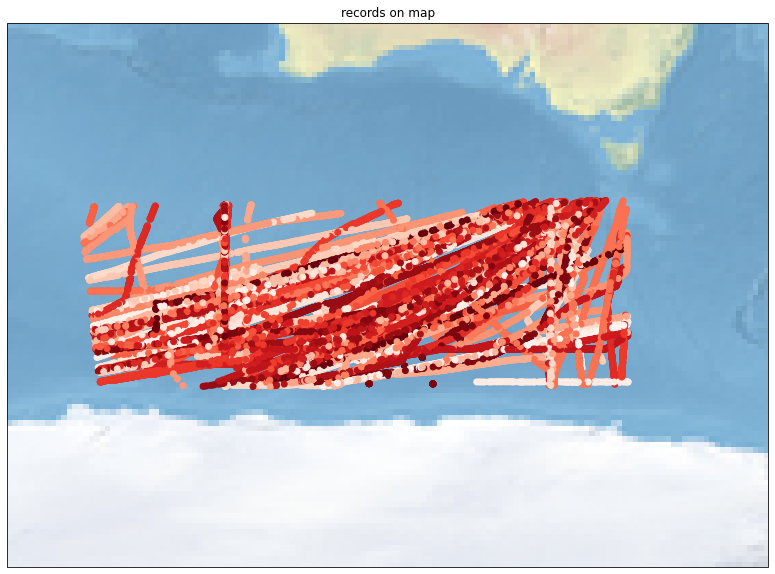

In [23]:
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.stock_img()

ax.scatter(x="decimalLongitude", y="decimalLatitude", c="date_mid", cmap="Reds", data=df, transform=cartopy.crs.PlateCarree())
ax.set_title("records on map")
ax.set_xlim(90,160)
ax.set_ylim(-80, -30)
plt.show()